In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pkl_file = open("Server/TRs_wise_amydgala_group_results_10000_perms.pkl", "rb")
TRs_results = pickle.load(pkl_file)
pkl_file.close()
TRs_results

Behavior                                      Connection         r  \
0    cov_total  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.032258   
1     DASS_dep  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1  0.028334   
2     DASS_anx  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.005287   
3     DASS_str  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.046308   
4        bas_d  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.029946   
..         ...                                             ...       ...   
235   BIG5_con              Right Amygdala_x_Right Hippocampus  0.036687   
236   BIG5_neu              Right Amygdala_x_Right Hippocampus  0.006296   
237   BIG5_ope              Right Amygdala_x_Right Hippocampus -0.016775   
238     erq_cr              Right Amygdala_x_Right Hippocampus -0.014559   
239     erq_es              Right Amygdala_x_Right Hippocampus -0.023430   

            p  perm_p  
0    0.005610  0.0056  
1    0.014987  0.0154  
2    0.649915  0.6397  
3    0.000070  0.0002  
4    0.010137  0.0121  
..        ...     ...  
235  0.001631  0.0020  
236  0.588900  0.5889  
237  0.149842  0.1488  
238  0.211371  0.2124  
239  0.044276  0.0448  

[240 rows x 5 columns]

In [3]:
df_500 = pd.read_csv("Server/TRs_wise_amydgala_group_results_500_perms.csv")
df_filtre_500 = TRs_results.drop(df_500[TRs_results['perm_p'] == 0].index)
df_filtre_500 = df_filtre_500.reset_index(drop=True)
df_filtre_500

Behavior                                      Connection         r  \
0    cov_total  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.032258   
1     DASS_dep  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1  0.028334   
2     DASS_anx  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.005287   
3     DASS_str  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.046308   
4        bas_d  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.029946   
..         ...                                             ...       ...   
166   BIG5_con              Right Amygdala_x_Right Hippocampus  0.036687   
167   BIG5_neu              Right Amygdala_x_Right Hippocampus  0.006296   
168   BIG5_ope              Right Amygdala_x_Right Hippocampus -0.016775   
169     erq_cr              Right Amygdala_x_Right Hippocampus -0.014559   
170     erq_es              Right Amygdala_x_Right Hippocampus -0.023430   

            p  perm_p  
0    0.005610  0.0056  
1    0.014987  0.0154  
2    0.649915  0.6397  
3    0.000070  0.0002  
4    0.010137  0.0121  
..        ...     ...  
166  0.001631  0.0020  
167  0.588900  0.5889  
168  0.149842  0.1488  
169  0.211371  0.2124  
170  0.044276  0.0448  

[171 rows x 5 columns]

In [4]:
behavior_data = pd.read_excel('ordered_by_sub_behavior_score.xlsx')
start_column_name = "cov_total"  # the name of the column you want to start from
behaviors = list(behavior_data.columns[behavior_data.columns.get_loc(start_column_name):])

In [5]:
#remove lnes with perm_p = 0 for the plots
TRs_results_filtre = TRs_results.drop(TRs_results[TRs_results['perm_p'] == 0].index)
TRs_results_filtre = TRs_results_filtre.reset_index(drop=True)
TRs_results_filtre

Behavior                                      Connection         r  \
0    cov_total  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.032258   
1     DASS_dep  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1  0.028334   
2     DASS_anx  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.005287   
3     DASS_str  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.046308   
4        bas_d  Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1 -0.029946   
..         ...                                             ...       ...   
166   BIG5_con              Right Amygdala_x_Right Hippocampus  0.036687   
167   BIG5_neu              Right Amygdala_x_Right Hippocampus  0.006296   
168   BIG5_ope              Right Amygdala_x_Right Hippocampus -0.016775   
169     erq_cr              Right Amygdala_x_Right Hippocampus -0.014559   
170     erq_es              Right Amygdala_x_Right Hippocampus -0.023430   

            p  perm_p  
0    0.005610  0.0056  
1    0.014987  0.0154  
2    0.649915  0.6397  
3    0.000070  0.0002  
4    0.010137  0.0121  
..        ...     ...  
166  0.001631  0.0020  
167  0.588900  0.5889  
168  0.149842  0.1488  
169  0.211371  0.2124  
170  0.044276  0.0448  

[171 rows x 5 columns]

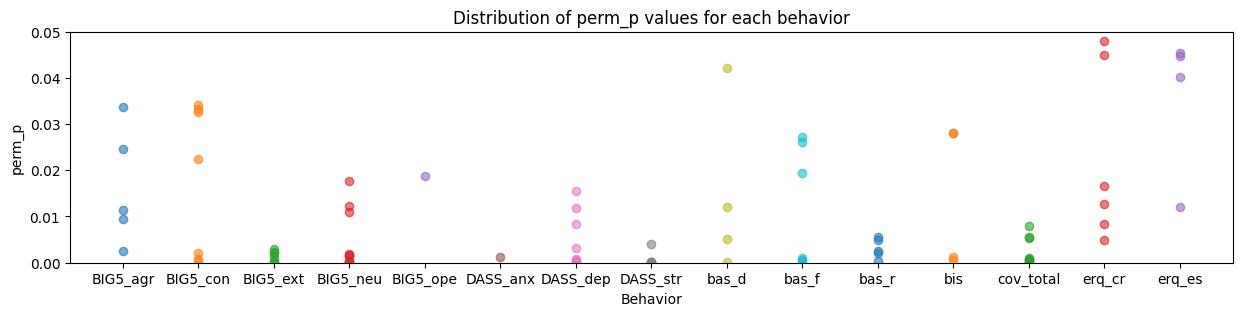

In [23]:
# Grouper les valeurs de r par comportement
grouped_data = TRs_results_filtre.groupby('Behavior')['perm_p']
plt.figure(figsize=(15, 3))

# Créer un scatter plot pour chaque comportement
for behavior, group in grouped_data:
    plt.scatter([behavior] * len(group), group, marker= 'o', alpha = 0.6)

# Configurer l'axe des x
plt.xticks(TRs_results_filtre['Behavior'].unique())

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('Distribution of perm_p values for each behavior')
plt.ylim(0, 0.05)

# Afficher le graphique
plt.show()

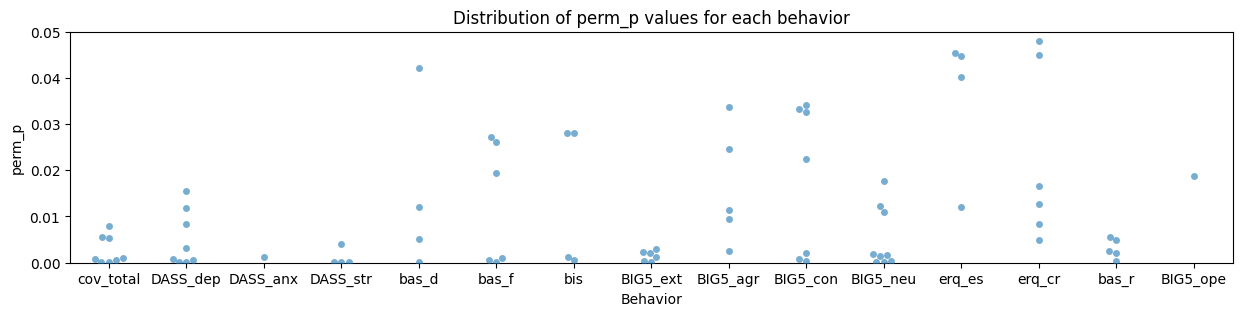

In [30]:
import seaborn as sns
# Grouper les valeurs de r par comportement
# Grouper les valeurs de r par comportement
grouped_data = TRs_results_filtre.groupby('Behavior')['perm_p']

# Créer un scatter plot pour chaque comportement avec seaborn.swarmplot()
plt.figure(figsize=(15, 3))
sns.swarmplot(data=TRs_results_filtre, x='Behavior', y='perm_p', alpha=0.6)

# Configurer l'axe des x
plt.xticks(TRs_results_filtre['Behavior'].unique())

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.ylim(0, 0.05)
plt.title('Distribution of perm_p values for each behavior')


# Afficher le graphique
plt.show()

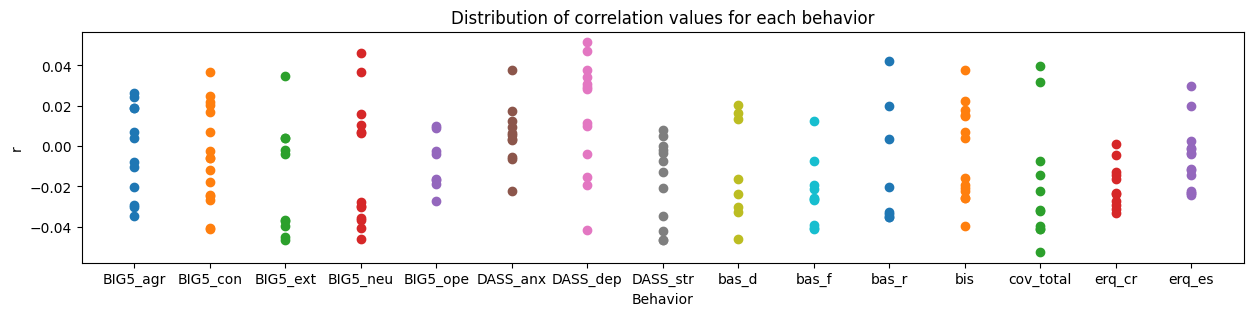

In [32]:
# Grouper les valeurs de r par comportement
grouped_data = TRs_results_filtre.groupby('Behavior')['r']
plt.figure(figsize=(15, 3))

# Créer un scatter plot pour chaque comportement
for behavior, group in grouped_data:
    plt.scatter([behavior] * len(group), group)

# Configurer l'axe des x
plt.xticks(TRs_results_filtre['Behavior'].unique())

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('r')
plt.title('Distribution of correlation values for each behavior')

# Afficher le graphique
plt.show()

Connectivity vs Behavior

In [43]:
pkl_file = open("Server/Plot/pairwise_movie.pkl", "rb")
pairwise_movie= pickle.load(pkl_file)
pkl_file.close()
pairwise_movie['fMRI']

[{'Left Amygdala_x_7Networks_LH_Vis_1':      0         1         2         3         4         5         6         7   \
  0   NaN -0.037833   0.02991 -0.021094  0.038275  0.054478  0.010727   0.07662   
  1   NaN       NaN -0.008827  0.045344  0.023513 -0.032813  0.055993  0.047574   
  2   NaN       NaN       NaN  0.081219  0.027415  0.018103  0.080686  0.089394   
  3   NaN       NaN       NaN       NaN -0.030241  0.053694  0.027806  0.096952   
  4   NaN       NaN       NaN       NaN       NaN  0.029662  0.016013  0.049034   
  5   NaN       NaN       NaN       NaN       NaN       NaN -0.005349  0.043217   
  6   NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.073709   
  7   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
  8   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
  9   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
  10  NaN       NaN       NaN       NaN       NaN

In [60]:
pairwise_movie['fMRI']
index = next((index for index, d in enumerate(pairwise_movie['fMRI']) if 'test' in d), None)

TypeError: argument of type 'NoneType' is not iterable